In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mushrooms = pd.read_csv('../Datasets/mushrooms.csv')

In [4]:
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## #Data Visualization and Data Analysis

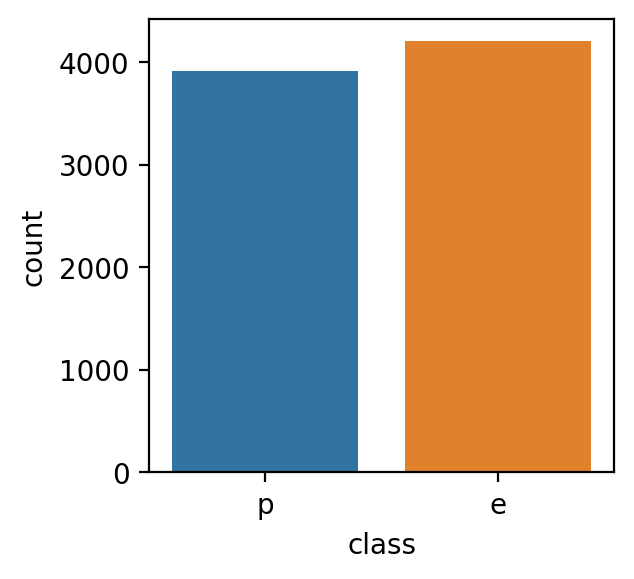

In [8]:
plt.figure(figsize=(3,3),dpi=200)
sns.countplot(data=mushrooms,x='class')
plt.show()

In [9]:
mushrooms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

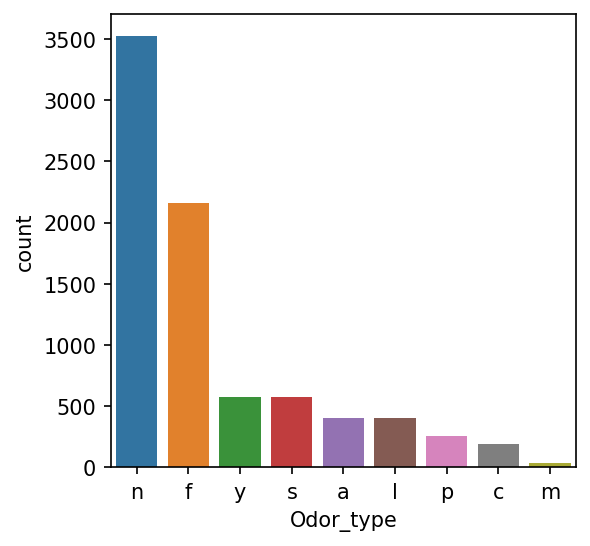

In [22]:
plt.figure(figsize=(4,4),dpi=150)
sns.barplot(y=mushrooms['odor'].value_counts().values,x=mushrooms['odor'].value_counts().index)
plt.xlabel('Odor_type')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

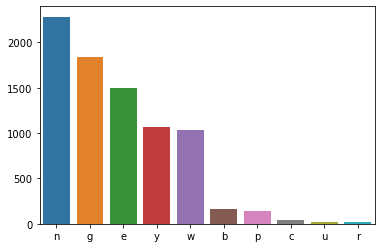

In [28]:
sns.barplot(y=mushrooms['cap-color'].value_counts().values,x=mushrooms['cap-color'].value_counts().index)

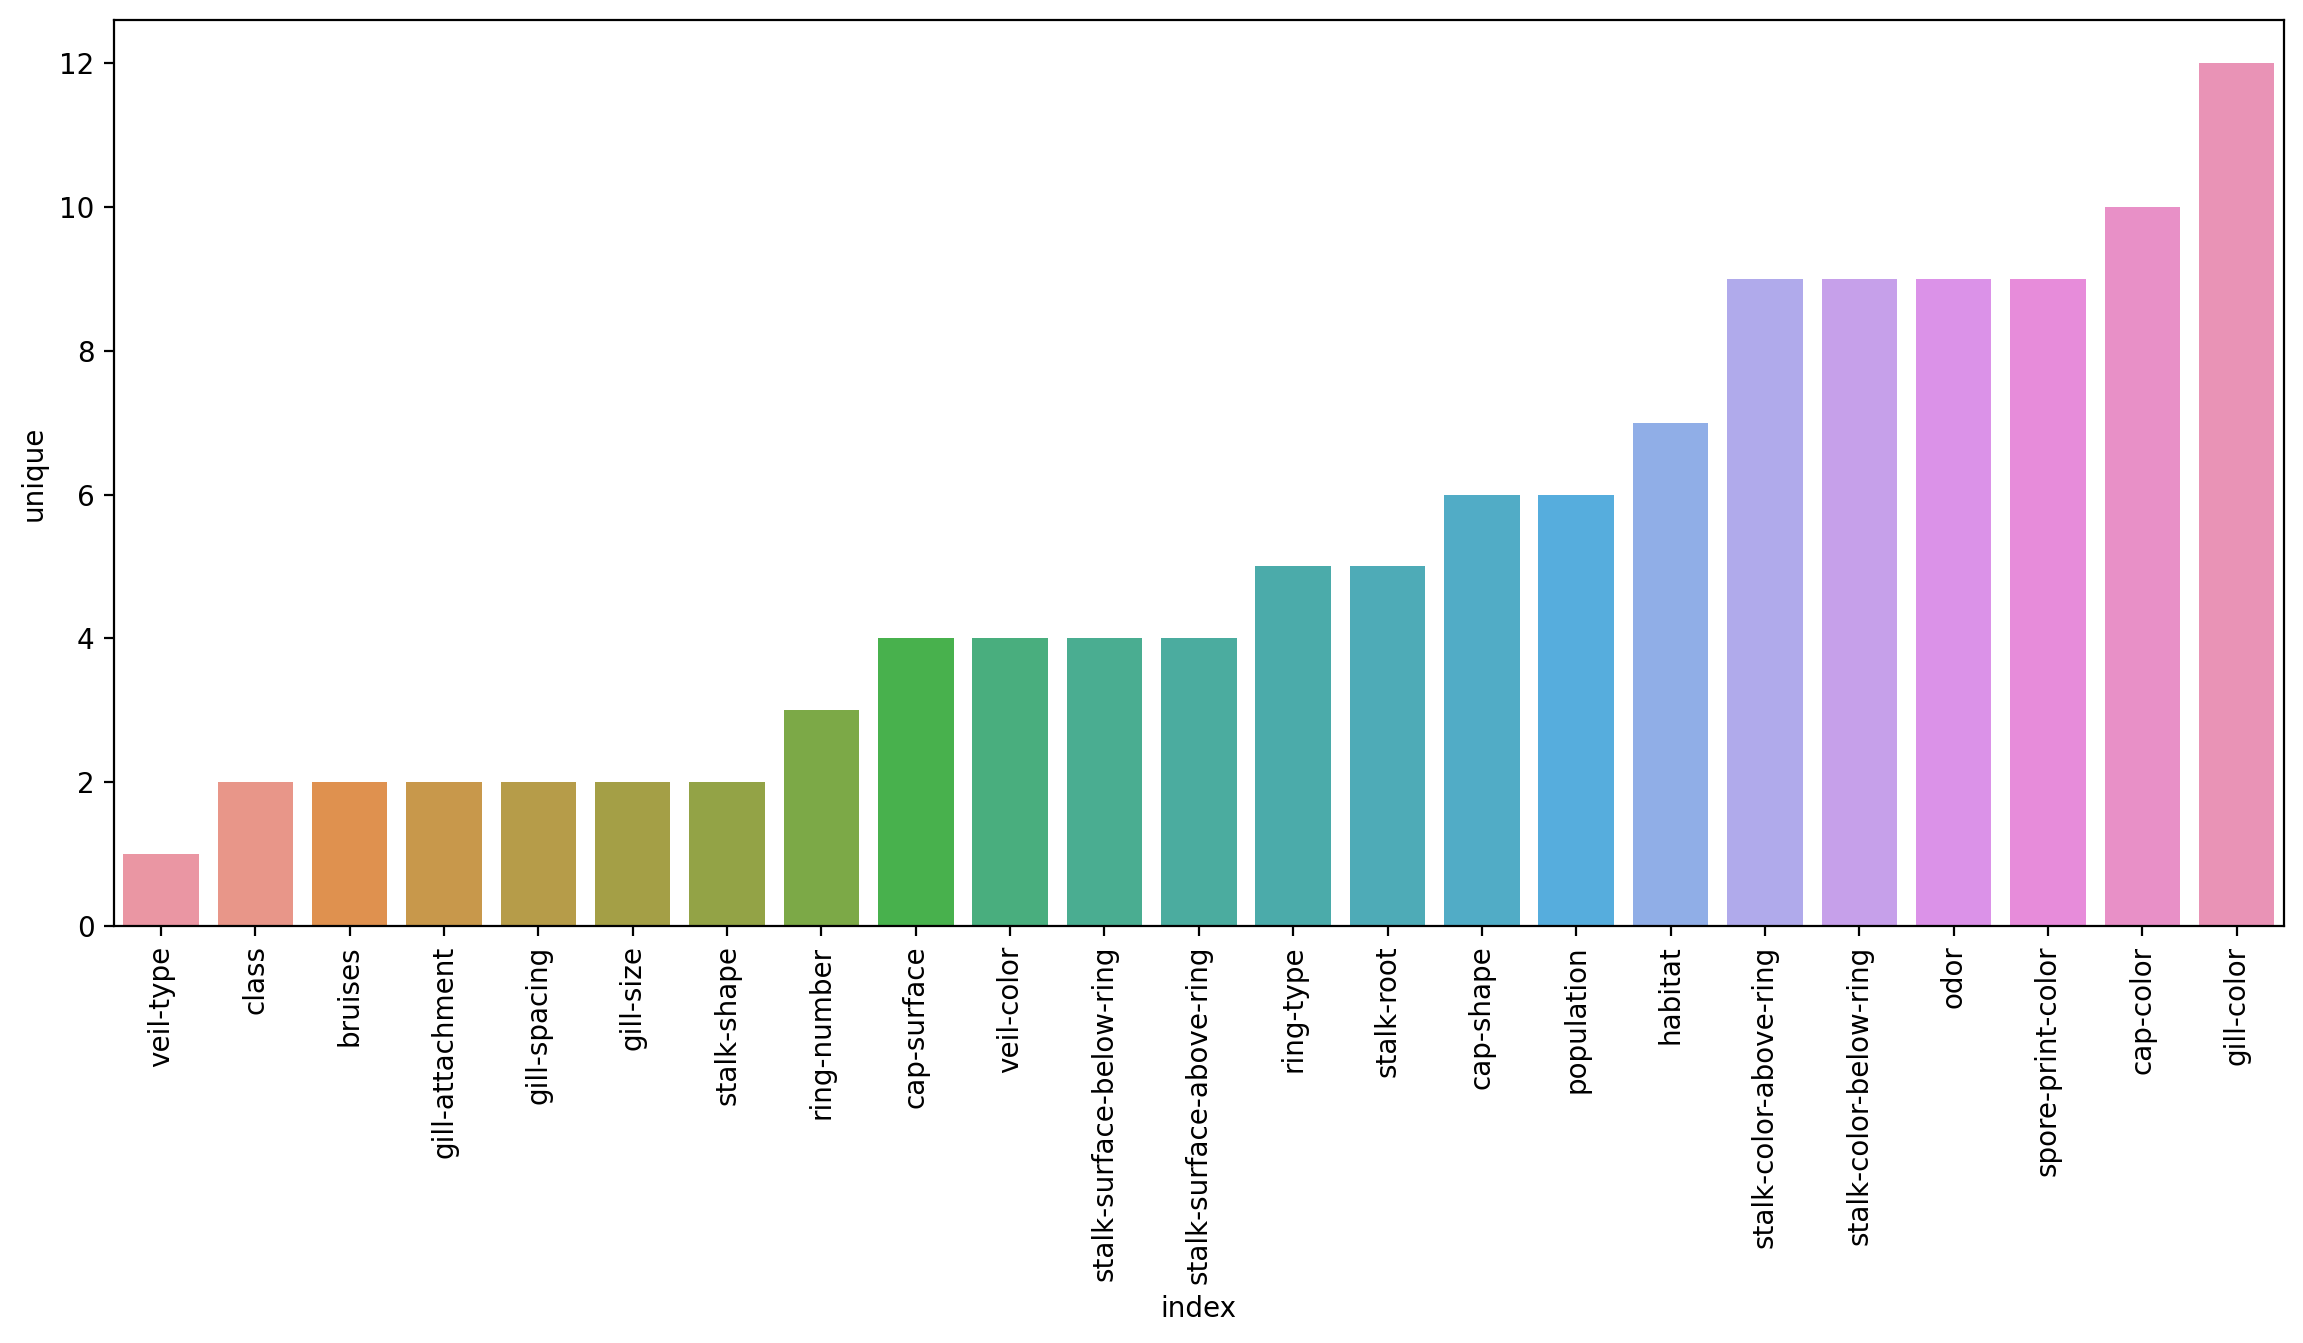

In [76]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=mushrooms.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

## #Feature Engineering

In [29]:
X = mushrooms.drop(columns='class')

In [30]:
y = mushrooms['class']

In [31]:
## get_dummies
X = pd.get_dummies(X,drop_first=True)

In [32]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## #Split data into train-test and build model

In [33]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.33)

##  #Boosting Model Adb(Adapative Boosting)

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
model = AdaBoostClassifier(n_estimators=100,learning_rate=0.01)

In [87]:
model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [88]:
pred_value = model.predict(X_test)

## #Model Evaluation

In [89]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix

In [90]:
confusion_matrix(y_test,pred_value)

array([[1116,  284],
       [  46, 1235]], dtype=int64)

In [91]:
print(classification_report(y_test,pred_value))

              precision    recall  f1-score   support

           e       0.96      0.80      0.87      1400
           p       0.81      0.96      0.88      1281

    accuracy                           0.88      2681
   macro avg       0.89      0.88      0.88      2681
weighted avg       0.89      0.88      0.88      2681



In [92]:
accuracy_score(y_test,pred_value)

0.8769116001491981

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


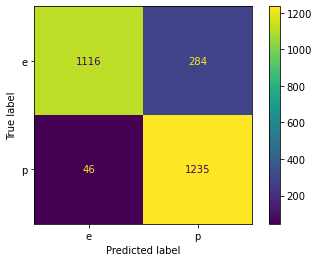

In [93]:
plot_confusion_matrix(model,X_test,y_test)

In [94]:
model.base_estimator_

DecisionTreeClassifier(max_depth=1)

In [95]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.54, 0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [96]:
model.feature_importances_.argmax()

22

In [97]:
## calculate best n_estimators
error_rate = []
for i in range(1,40):
    model1 = AdaBoostClassifier(n_estimators=i,random_state=101)
    model1.fit(X_train,y_train)
    prediction = model1.predict(X_test)
    err= accuracy_score(y_test,prediction)
    error_rate.append(err)

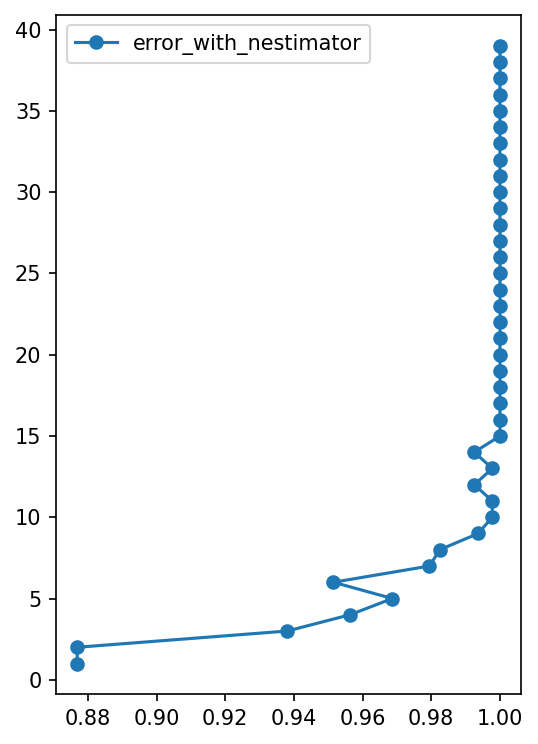

In [98]:
plt.figure(figsize=(4,6),dpi=150)
plt.plot(error_rate,range(1,40),label='error_with_nestimator',marker='o')
plt.legend()
plt.show()

In [106]:
best_model = AdaBoostClassifier(n_estimators=9)
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)

In [132]:
accuracy_score(y_test,y_pred)

0.9936590824319284

## #Best feature for out first model i.e model

In [134]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ,
       0.54, 0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [118]:
feats = pd.DataFrame(data=model.feature_importances_,columns=['feature_imp'],index =X.columns)

In [128]:
imp_feature = feats[feats['feature_imp']> 0.01]

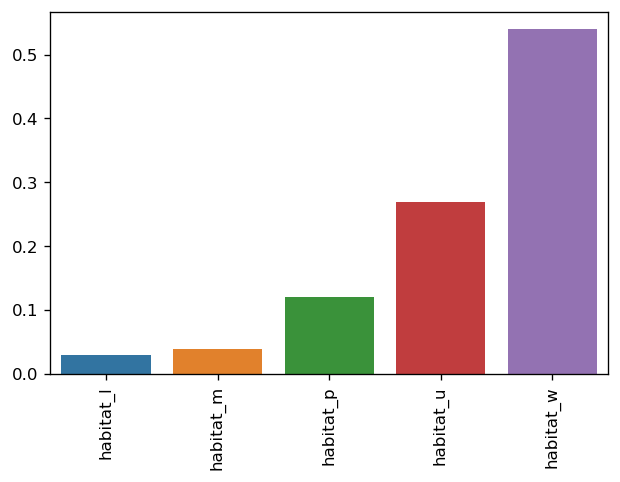

In [135]:
plt.figure(figsize=(6,4),dpi=120)
sns.barplot(data=imp_feature,x=imp_feature.index,y=imp_feature['feature_imp'].values)
plt.xticks(rotation=90)
plt.show()

In [136]:
help(AdaBoostClassifier)

Help on class AdaBoostClassifier in module sklearn.ensemble._weight_boosting:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requi